# U.S. Medical Insurance Costs

In [109]:
import csv
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt

In [110]:
age_list = []
sex_list =[]
bmi_list = []
children_list = []
smoker_list = []
region_list = []
charges_list = []


with open('insurance.csv') as insurance_file:
    insurance_data = csv.DictReader(insurance_file)
    for row in insurance_data:
        age_list.append(float(row['age']))
        sex_list.append(row['sex'])
        bmi_list.append(float(row['bmi']))
        children_list.append(float(row['children']))
        smoker_list.append(row['smoker'])
        region_list.append(row['region'])
        charges_list.append(float(row['charges']))

## Age Statistics of Sample Population

In [111]:
def calculate_age(list):
    average_age = round(stat.mean(list), 2)
    median_age = round(stat.median(list), 2)
    stdev_age = round(stat.stdev(list), 2)
    return "The sample population has a mean age of {average}, a median age of {median} and a standard deviation of {stdev}".format(average=average_age, median=median_age, stdev=stdev_age)

calculate_age(age_list)

'The sample population has a mean age of 39.21, a median age of 39.0 and a standard deviation of 14.05'

## Graph of Age Distribution

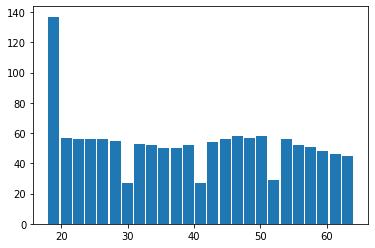

In [112]:
hist_age_value = np.sort(age_list)
plt.hist(hist_age_value, rwidth=0.9, bins=25)
plt.show()

## Region with most individuals
Where are the individuals coming from

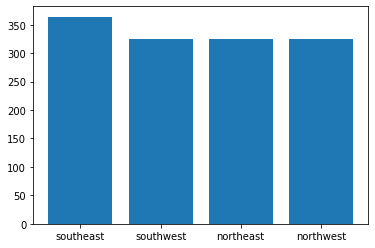

In [113]:
def calculate_region_total(list):
    southeast_total = 0
    southwest_total = 0
    northeast_total = 0
    northwest_total = 0
    for i in range(0, len(list)):
        if list[i] == 'southeast':
            southeast_total += 1  
        elif list[i] == 'southwest':
            southwest_total += 1  
        elif list[i] == 'northeast':
            northeast_total += 1  
        else:
            northwest_total +=1   
    x_points = ['southeast', 'southwest', 'northeast', 'northwest']
    y_points = [southeast_total, southwest_total, northeast_total, northwest_total]
    plt.bar(x_points, y_points)
    plt.show()

calculate_region_total(region_list)

# Part 1 | Analysis & Comparison

In [114]:
final_findings = dict()

## Smoker comparison
We will compare the average cost of a smoker vs a non-smoker

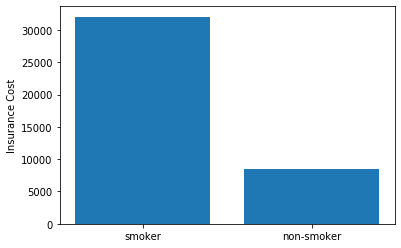

In [115]:
def calculate_smoker_comparison(smoker_list, charges_list):
    total_smoker_cost = 0
    smoker_count = 0
    for i in range(0, len(smoker_list)):
        if smoker_list[i] == "yes":
            total_smoker_cost += charges_list[i]
            smoker_count += 1
        non_smoker_count = len(smoker_list) - smoker_count
        total_non_smoker_cost = sum(charges_list) - total_smoker_cost
    avg_smoker_cost = round(total_smoker_cost / smoker_count)
    avg_non_smoker_cost = round(total_non_smoker_cost / non_smoker_count)
    difference_smoker_cost = round(avg_smoker_cost - avg_non_smoker_cost)

    #plot the data
    x_points = ['smoker', 'non-smoker']
    y_points = [avg_smoker_cost, avg_non_smoker_cost]
    
    plt.bar(x_points, y_points)
    plt.ylabel('Insurance Cost')
    plt.show()
    
    #return relevant variables
    return avg_smoker_cost, difference_smoker_cost

avg_smoker_cost, difference_smoker_cost = calculate_smoker_comparison(smoker_list, charges_list)

final_findings.update({'Average Smoker Cost': avg_smoker_cost, 'Average Smoker Cost Penalty': difference_smoker_cost})

## Children comparison
We will compare the average cost of parent vs a individual without kids

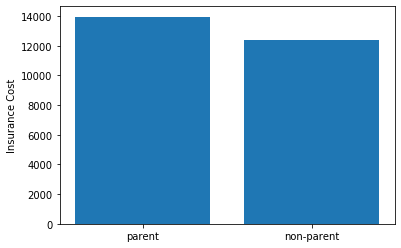

In [116]:
def calculate_children_comparison(children_list, charges_list):
    parent_count = 0
    total_parent_cost = 0
    for i in range(0, len(children_list)):
        if children_list[i] >= 1:
            total_parent_cost += charges_list[i]
            parent_count += 1
        non_parent_count = len(children_list) - parent_count
        total_non_parent_cost = sum(charges_list) - total_parent_cost
    avg_parent_cost = round(total_parent_cost/parent_count)
    avg_non_parent_cost = round(total_non_parent_cost/non_parent_count)
    difference_parent_charges = avg_parent_cost - avg_non_parent_cost
    
    #plot the data
    x_points = ['parent', 'non-parent']
    y_points = [avg_parent_cost, avg_non_parent_cost]
    
    plt.bar(x_points, y_points)
    plt.ylabel('Insurance Cost')
    plt.show()
    
    #return relevant variables
    return avg_parent_cost, difference_parent_charges

avg_parent_cost, difference_parent_charges = calculate_children_comparison(children_list, charges_list)

final_findings.update({'Average Parent Cost': avg_parent_cost, 'Average Parent Cost Penalty': difference_parent_charges})

## Analysis of parents' age
We will find the average age of a parent and also the youngest parent in the dataset

In [117]:
def calculate_parent_age(age_list, children_list):
    parent_age_list = []
    for i in range(0, len(age_list)):
        if children_list[i] >= 1:
            parent_age_list.append(age_list[i])
    average_parent_age = round(stat.mean(parent_age_list))
    median_parent_age = round(stat.median(parent_age_list))
    youngest_parent_age = min(parent_age_list)
    return average_parent_age, youngest_parent_age

average_parent_age, youngest_parent_age = calculate_parent_age(age_list, children_list)

## BMI score comparison
We will analyse the relation between BMI score and Insurance Cost.
To do so we will isolate the BMI factor by filtering the population as follow:
- age: 25-35
- sex : female
- children : 0
- smoker : no
-remove outlier : charges < 8000

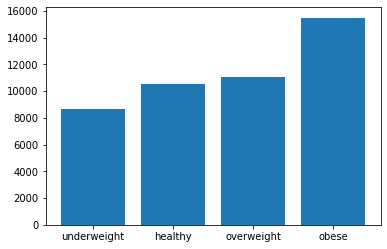

In [118]:
def plot_bmi_scores(bmi_list, charges_list):     
    #create BMI weight status list
    bmi_status_list = []
    for i in range(0, len(bmi_list)):
        if bmi_list[i] <= 18.5:
            bmi_status_list.append('underweight')
        elif bmi_list[i] <= 25.9:
            bmi_status_list.append('healthy')
        elif bmi_list[i] <= 29.9:
            bmi_status_list.append('overweight')
        else:
            bmi_status_list.append('obese')
            
    #calculate BMI status average cost
    underweight_count = 0
    healthy_count = 0
    overweight_count = 0
    obese_count = 0
    underweight_total_cost = 0
    healthy_total_cost = 0
    overweight_total_cost = 0
    obese_total_cost = 0
    for i in range(0, len(bmi_status_list)):
        if bmi_status_list[i] == "underweight":
            underweight_count += 1
            underweight_total_cost += charges_list[i]
        elif bmi_status_list[i] == "healthy":
            healthy_count += 1
            healthy_total_cost += charges_list[i]
        elif bmi_status_list[i] == "overweight":
            overweight_count += 1
            overweight_total_cost += charges_list[i]
        else:
            obese_count += 1
            obese_total_cost += charges_list[i]
    avg_underweight_cost = round(underweight_total_cost/underweight_count)
    avg_healthy_cost = round(healthy_total_cost/healthy_count)
    avg_overweight_cost = round(overweight_total_cost/overweight_count)
    avg_obese_cost = round(obese_total_cost/obese_count)
    difference_obese_cost = avg_obese_cost-avg_healthy_cost
    
    #plot the data to see the difference in cost
    x_points = ['underweight', 'healthy', 'overweight', 'obese']
    y_points = [avg_underweight_cost, avg_healthy_cost, avg_overweight_cost, avg_obese_cost]
    plt.bar(x_points, y_points)
    plt.show
    
    #return the relevant variables for storage
    return avg_healthy_cost, avg_obese_cost, difference_obese_cost
            
avg_healthy_cost, avg_obese_cost, difference_obese_cost = plot_bmi_scores(bmi_list, charges_list)

final_findings.update({'Average Healthy BMI Cost': avg_healthy_cost, 'Average Obese BMI Cost': avg_obese_cost, 'Average Obese Penalty Cost Penalty': difference_obese_cost})


## Show findings

In [119]:
def show_findings(final_findings):
    smoker_cost = final_findings['Average Smoker Cost']
    smoker_penalty = final_findings['Average Smoker Cost Penalty']
    smoker_findings = 'The average smoker pays {cost} dollars in insurance costs. It is on average {penalty} dollars more than a non-smoker.'.format(cost=smoker_cost, penalty=smoker_penalty)
    parent_findings = 'The average parent pays {cost} dollars in insurance costs. It is on average {penalty} dollars more than someone without kids.'.format(cost=final_findings['Average Parent Cost'], penalty=final_findings['Average Parent Cost Penalty'])
    bmi_findings = 'The average obese person pays {cost} dollars in insurance costs. It is on average {penalty} dollars more than an healthy person.'.format(cost=final_findings['Average Obese BMI Cost'], penalty=final_findings['Average Obese Penalty Cost Penalty'])
    return smoker_findings, parent_findings, bmi_findings
    
smoker_findings, parent_findings, bmi_findings=show_findings(final_findings)

print(smoker_findings)
print(parent_findings)
print(bmi_findings)

The average smoker pays 32050 dollars in insurance costs. It is on average 23616 dollars more than a non-smoker.
The average parent pays 13950 dollars in insurance costs. It is on average 1584 dollars more than someone without kids.
The average obese person pays 15492 dollars in insurance costs. It is on average 4962 dollars more than an healthy person.
